# Maestría en Economía Aplicada - UBA

## Taller de Programación

## Trabajo Práctico 2

## Docente: Noelia Romero

## Grupo No 5

## Cammisi, Andrés // Porco, Matías // Pineda, David

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
import os

# Cambiar directorio de trabajo
os.chdir('/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP2')

# Verificar que funcionó
print("Directorio actual:", os.getcwd())

Directorio actual: /Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP2


In [16]:
# ------------------------------------------------------------
# Carga de la base EPH 2005 
# ------------------------------------------------------------

base_2005 = pd.read_stata('Individual_t105.dta', convert_categoricals=False)

print("Dimensiones base 2005:", base_2005.shape)
base_2005.head()

Dimensiones base 2005: (47030, 176)


,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1017.0,...,08,,07,08,,05,0.0,0.0,0.0,00000
1,125188,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,40020
2,125188,1.0,2.0,1.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
3,125188,1.0,3.0,0.0,2005.0,1.0,1.0,S,32.0,1062.0,...,02,,02,02,,01,0.0,0.0,0.0,00000
4,125242,1.0,1.0,1.0,2005.0,1.0,1.0,S,32.0,1103.0,...,09,,09,09,,07,0.0,0.0,0.0,00000


In [17]:
# ------------------------------------------------------------
# Filtrar Región Pampeana
# ------------------------------------------------------------
base_2005 = base_2005[base_2005['region'] == 43].copy()

print("Dimensiones tras filtrar Región Pampeana:", base_2005.shape)

Dimensiones tras filtrar Región Pampeana: (14651, 176)


In [18]:
# ------------------------------------------------------------
# Ajustar nombres de columnas a minúsculas
# ------------------------------------------------------------
base_2005.columns = base_2005.columns.str.lower()

# ------------------------------------------------------------
# Seleccionar variables de interés
# ------------------------------------------------------------
vars_interes = [
    'codusu', 'nro_hogar', 'ch04', 'ch06', 'ch07', 'ch08',
    'ch12', 'ch13', 'ch14',
    'nivel_ed', 'estado', 'cat_inac', 'itf', 'ipcf',
    'pondera', 'cat_ocup', 'pp03d', 'pp3e_tot', 
    'pp3f_tot', 'pp04a', 'pp04c', 'pp10a'
]

eph05 = base_2005[vars_interes].copy()

print("Dimensiones del subconjunto:", eph05.shape)
eph05.head()

Dimensiones del subconjunto: (14651, 22)


,codusu,nro_hogar,ch04,ch06,ch07,ch08,ch12,ch13,ch14,nivel_ed,...,itf,ipcf,pondera,cat_ocup,pp03d,pp3e_tot,pp3f_tot,pp04a,pp04c,pp10a
29150,125082,1.0,1.0,28.0,2.0,4.0,2.0,1.0,,2.0,...,840.0,280.0,377.0,3.0,0.0,72.0,0.0,2.0,4.0,0.0
29151,125082,1.0,2.0,30.0,2.0,1.0,6.0,1.0,,6.0,...,840.0,280.0,377.0,3.0,2.0,30.0,12.0,1.0,6.0,0.0
29152,125082,1.0,1.0,4.0,5.0,1.0,1.0,2.0,01,7.0,...,840.0,280.0,377.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29153,125283,1.0,1.0,66.0,2.0,2.0,4.0,2.0,03,3.0,...,4300.0,1075.0,283.0,3.0,0.0,0.0,0.0,2.0,2.0,0.0
29154,125283,1.0,2.0,60.0,2.0,2.0,4.0,2.0,02,3.0,...,4300.0,1075.0,283.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0


In [19]:
list(eph05.columns)

['codusu',
 'nro_hogar',
 'ch04',
 'ch06',
 'ch07',
 'ch08',
 'ch12',
 'ch13',
 'ch14',
 'nivel_ed',
 'estado',
 'cat_inac',
 'itf',
 'ipcf',
 'pondera',
 'cat_ocup',
 'pp03d',
 'pp3e_tot',
 'pp3f_tot',
 'pp04a',
 'pp04c',
 'pp10a']

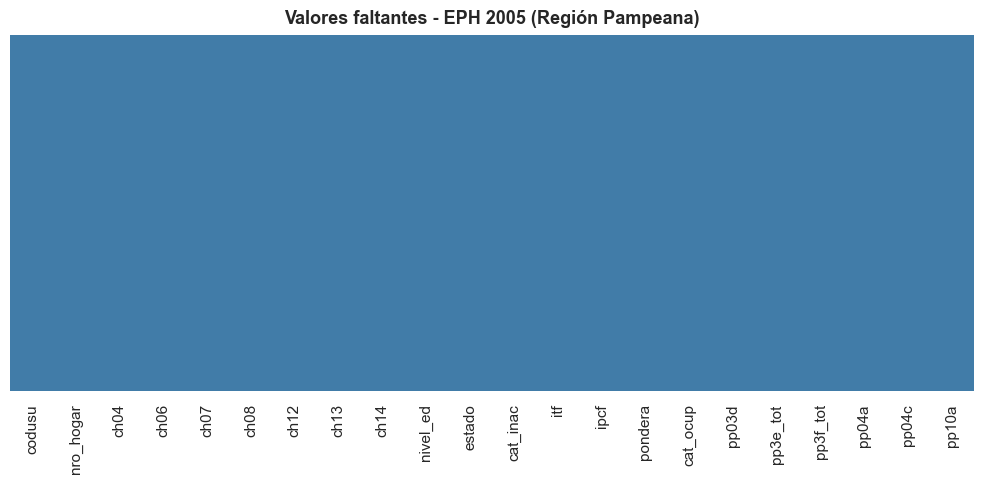

           Faltantes  % del total
codusu             0          0.0
nro_hogar          0          0.0
pp04c              0          0.0
pp04a              0          0.0
pp3f_tot           0          0.0
pp3e_tot           0          0.0
pp03d              0          0.0
cat_ocup           0          0.0
pondera            0          0.0
ipcf               0          0.0
itf                0          0.0
cat_inac           0          0.0
estado             0          0.0
nivel_ed           0          0.0
ch14               0          0.0
ch13               0          0.0
ch12               0          0.0
ch08               0          0.0
ch07               0          0.0
ch06               0          0.0
ch04               0          0.0
pp10a              0          0.0


In [20]:
# ------------------------------------------------------------
# Diagnóstico visual de valores faltantes - EPH 2005
# ------------------------------------------------------------

sns.set_theme(style='white')
plt.figure(figsize=(10,5))
sns.heatmap(eph05.isna(), cbar=False, yticklabels=False, cmap=sns.diverging_palette(240, 10, as_cmap=True), linewidths=0)
plt.title("Valores faltantes - EPH 2005 (Región Pampeana)", fontsize=13, weight='bold', pad=8)
for side in ['top','right','left','bottom']:
    plt.gca().spines[side].set_visible(False)
plt.tight_layout(); plt.show()

faltantes = eph05.isna().sum().sort_values(ascending=False)
porcentaje = round((faltantes/len(eph05))*100, 2)
print(pd.DataFrame({'Faltantes': faltantes, '% del total': porcentaje}))


In [21]:
# ------------------------------------------------------------
# 4) Diagnóstico rápido numérico 
# ------------------------------------------------------------
def perfil_num(df, cols):
    out = []
    for c in cols:
        s = pd.to_numeric(df[c], errors='coerce')
        out.append({
            "var": c, "n": len(s),
            "n_na": s.isna().sum(),
            "min": s.min(), "p1": s.quantile(0.01),
            "p50": s.quantile(0.50), "p99": s.quantile(0.99),
            "max": s.max(),
            "n_negativos": (s < 0).sum(),
            "n_cero": (s == 0).sum()
        })
    return pd.DataFrame(out).sort_values("var")

num_vars = ["ipcf","pp3e_tot","pp3f_tot","pp03d","ch06","pondera","ch14"]
print(perfil_num(eph05, num_vars))

print("\nFrecuencias CH12 (esperado 0..9; 99=Ns/Nr si apareciera):")
print(eph05['ch12'].value_counts(dropna=False).sort_index())
print("\nFrecuencias CH13 (1=Sí, 2=No, 9=Ns/Nr; 0=No corresponde -> NaN):")
print(eph05['ch13'].value_counts(dropna=False).sort_index())

        var      n  n_na   min    p1         p50     p99      max  \
4      ch06  14651     0  -1.0  -1.0   29.000000    84.0     98.0   
6      ch14  14651  7073   0.0   0.0    3.000000    98.0     99.0   
0      ipcf  14651     0   0.0   0.0  266.666667  1800.0  11300.0   
5   pondera  14651     0  35.0  92.0  341.000000   861.0   2268.0   
3     pp03d  14651     0   0.0   0.0    0.000000     2.0      9.0   
1  pp3e_tot  14651     0   0.0   0.0    0.000000    84.0    999.0   
2  pp3f_tot  14651     0   0.0   0.0    0.000000    20.0    999.0   

   n_negativos  n_cero  
4          205       0  
6            0    1099  
0            0     170  
5            0       0  
3            0   14217  
1            0    9376  
2            0   14232  

Frecuencias CH12 (esperado 0..9; 99=Ns/Nr si apareciera):
ch12
0.0     1019
1.0      398
2.0     3614
3.0     2418
4.0     3375
5.0      751
6.0      923
7.0     2064
8.0       37
9.0       50
99.0       2
Name: count, dtype: int64

Frecuencias C

In [23]:
# ------------------------------------------------------------
# Limpieza final 
# ------------------------------------------------------------
eph05_clean = eph05.copy()

# 5A. CH12: válidos = 0..9 ; 99 -> NaN; otros fuera de rango -> NaN
eph05_clean['ch12'] = pd.to_numeric(eph05_clean['ch12'], errors='coerce')
eph05_clean.loc[eph05_clean['ch12'] == 99, 'ch12'] = np.nan
eph05_clean.loc[~eph05_clean['ch12'].isin([0,1,2,3,4,5,6,7,8,9]), 'ch12'] = np.nan
eph05_clean['ch12'] = eph05_clean['ch12'].astype('Int64')

# 5B. CH13: 1=Sí, 2=No, 9=Ns/Nr->NaN; 0 (no corresponde) -> NaN; binaria 0/1
eph05_clean['ch13'] = pd.to_numeric(eph05_clean['ch13'], errors='coerce')
eph05_clean['ch13'] = eph05_clean['ch13'].replace({9: np.nan, 0: np.nan}).astype('Int64')
eph05_clean['ch13_bin'] = eph05_clean['ch13'].map({1:1, 2:0}).astype('Int64')

# 5C. CH14: '00'..'09' válidos; 98 (Ed. especial) y 99 (Ns/Nr) -> NaN; ''/espacios -> NaN
eph05_clean['ch14'] = eph05_clean['ch14'].replace(['  ',''], np.nan)
eph05_clean['ch14'] = pd.to_numeric(eph05_clean['ch14'], errors='coerce')
eph05_clean.loc[eph05_clean['ch14'].isin([98,99]), 'ch14'] = np.nan
eph05_clean.loc[~eph05_clean['ch14'].isin([0,1,2,3,4,5,6,7,8,9]), 'ch14'] = np.nan
eph05_clean['ch14'] = eph05_clean['ch14'].astype('Int64')

# 5D. Edad (CH06): negativos -> 0
eph05_clean.loc[eph05_clean["ch06"] < 0, "ch06"] = 0

# 5E. Horas trabajadas (PP03D): fuera de [0,120] -> NaN
eph05_clean.loc[(eph05_clean["pp03d"] < 0) | (eph05_clean["pp03d"] > 120), "pp03d"] = np.nan

# 5F. Ingresos laborales (PP3E_TOT y PP3F_TOT): códigos 9/99/999/9999/99999 -> NaN; negativos -> NaN
for v in ["pp3e_tot","pp3f_tot"]:
    eph05_clean[v + "_missing"] = eph05_clean[v].isin([9,99,999,9999,99999]).astype(int)
    eph05_clean.loc[eph05_clean[v].isin([9,99,999,9999,99999]), v] = np.nan
    eph05_clean.loc[eph05_clean[v] < 0, v] = np.nan

# 5G. IPCF e ITF: negativos -> NaN
eph05_clean.loc[eph05_clean["ipcf"] < 0, "ipcf"] = np.nan
eph05_clean.loc[eph05_clean["itf"]  < 0, "itf"]  = np.nan

# 5H. Ponderador (PONDERA): debe ser > 0
eph05_clean.loc[eph05_clean["pondera"] <= 0, "pondera"] = np.nan

In [24]:
# ------------------------------------------------------------
# Resumen de limpieza
# ------------------------------------------------------------
na_antes = eph05.reindex(columns=eph05_clean.columns).isna().sum()
na_desp  = eph05_clean.isna().sum()
resumen_limpieza = pd.DataFrame({"NAs antes": na_antes, "NAs después": na_desp})
resumen_limpieza["Nuevos NAs"] = resumen_limpieza["NAs después"] - resumen_limpieza["NAs antes"].fillna(0)

vars_show = ["ch06","pp03d","pp3e_tot","pp3f_tot","ipcf","itf","pondera","ch12","ch13","ch13_bin","ch14"]
vars_show = [v for v in vars_show if v in resumen_limpieza.index]

print("Limpieza completada.\n")
display(resumen_limpieza.loc[vars_show].fillna(0).astype(int, errors='ignore'))

Limpieza completada.



,NAs antes,NAs después,Nuevos NAs
ch06,0,0,0
pp03d,0,0,0
pp3e_tot,0,47,47
pp3f_tot,0,28,28
ipcf,0,0,0
itf,0,0,0
pondera,0,0,0
ch12,0,2,2
ch13,0,1021,1021
ch13_bin,14651,1021,-13630


In [25]:
# 1) No respuestas en ingresos 
print("pp3e_tot_missing =", eph05_clean['pp3e_tot_missing'].sum())
print("pp3f_tot_missing =", eph05_clean['pp3f_tot_missing'].sum())

# 2) Distribuciones educativas ya limpias
print("\nCH12 (0..9, NaN si Ns/Nr):")
print(eph05_clean['ch12'].value_counts(dropna=False).sort_index())

print("\nCH13 (1/2, NaN si 0 o 9):")
print(eph05_clean['ch13'].value_counts(dropna=False).sort_index())

print("\nCH13_bin (1/0):")
print(eph05_clean['ch13_bin'].value_counts(dropna=False))

print("\nCH14 (0..9, NaN si 98/99/blank):")
print(eph05_clean['ch14'].describe())


pp3e_tot_missing = 47
pp3f_tot_missing = 28

CH12 (0..9, NaN si Ns/Nr):
ch12
0       1019
1        398
2       3614
3       2418
4       3375
5        751
6        923
7       2064
8         37
9         50
<NA>       2
Name: count, dtype: Int64

CH13 (1/2, NaN si 0 o 9):
ch13
1       6053
2       7577
<NA>    1021
Name: count, dtype: Int64

CH13_bin (1/0):
ch13_bin
0       7577
1       6053
<NA>    1021
Name: count, dtype: Int64

CH14 (0..9, NaN si 98/99/blank):
count      7485.0
mean     2.857181
std      2.153339
min           0.0
25%           1.0
50%           3.0
75%           4.0
max           9.0
Name: ch14, dtype: Float64


In [26]:
# ------------------------------------------------------------
# Guardar base limpia
# ------------------------------------------------------------
ruta_salida_2005 = '/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP2/eph05_clean.csv'
eph05_clean.to_csv(ruta_salida_2005, index=False)
print(f"Base 2005 limpia guardada en:\n{ruta_salida_2005}")

Base 2005 limpia guardada en:
/Users/usuario/Documents/UBA/2025/Trimestre 3/Taller de programación/TPs/TP2/eph05_clean.csv


In [27]:
# ------------------------------------------------------------
# Cargar base EPH 2025 y normalizar columnas
# ------------------------------------------------------------
# Si ya tenés openpyxl, no hace falta instalar nada.
base_2025 = pd.read_excel('usu_individual_T125.xlsx')
print("Dimensiones base 2025 (cruda):", base_2025.shape)

base_2025.columns = base_2025.columns.str.lower()


Dimensiones base 2025 (cruda): (45425, 235)


In [ ]:
# ------------------------------------------------------------
# Diagnóstico rápido numérico + frecuencias CH12/CH13
# ------------------------------------------------------------
def perfil_num(df, cols):
    out = []
    for c in cols:
        s = pd.to_numeric(df[c], errors='coerce')
        out.append({
            "var": c, "n": len(s),
            "n_na": s.isna().sum(),
            "min": s.min(), "p1": s.quantile(0.01),
            "p50": s.quantile(0.50), "p99": s.quantile(0.99),
            "max": s.max(),
            "n_negativos": (s < 0).sum(),
            "n_cero": (s == 0).sum()
        })
    return pd.DataFrame(out).sort_values("var")

num_vars = ["ipcf","pp3e_tot","pp3f_tot","pp03d","ch06","pondera","ch14"]
print(perfil_num(eph05, num_vars))

print("\nFrecuencias CH12 (esperado 0..9; 99=Ns/Nr si apareciera):")
print(eph05['ch12'].value_counts(dropna=False).sort_index())
print("\nFrecuencias CH13 (1=Sí, 2=No, 9=Ns/Nr; 0=No corresponde -> NaN):")
print(eph05['ch13'].value_counts(dropna=False).sort_index())

In [28]:
# ------------------------------------------------------------
# Filtrar Región Pampeana
# ------------------------------------------------------------
base_2025 = base_2025[base_2025['region'] == 43].copy()
print("Dimensiones tras filtrar Región Pampeana:", base_2025.shape)

Dimensiones tras filtrar Región Pampeana: (13803, 235)


In [29]:
# ------------------------------------------------------------
# Selección de variables
# ------------------------------------------------------------
vars_interes = [
    'codusu','nro_hogar','ch04','ch06','ch07','ch08',
    'ch12','ch13','ch14',
    'nivel_ed','estado','cat_inac','itf','ipcf',
    'pondera','pondih','cat_ocup','pp03d','pp3e_tot','pp3f_tot','pp04a','pp04c','pp10a'
]

# Algunas encuestas pueden no traer todas; reindex para no fallar:
existentes = [v for v in vars_interes if v in base_2025.columns]
faltantes  = [v for v in vars_interes if v not in base_2025.columns]
if faltantes:
    print("AVISO: no se encontraron columnas en 2025:", faltantes)

eph25 = base_2025.reindex(columns=existentes).copy()
print("Dimensiones del subconjunto 2025:", eph25.shape)

Dimensiones del subconjunto 2025: (13803, 23)


In [30]:
# ------------------------------------------------------------
# Diagnóstico previo a la limpieza — EPH 2025
# ------------------------------------------------------------

# 1. Tipos de datos
print(eph25.dtypes[['ch12','ch13','ch14']])

# 2. Primeros valores únicos de cada variable educativa
for c in ['ch12','ch13','ch14']:
    if c in eph25.columns:
        print(f"\n=== {c}: primeros valores únicos ===")
        print(eph25[c].dropna().unique()[:20])

# 3. Frecuencias (para CH12 y CH13)
if 'ch12' in eph25.columns:
    print("\nFrecuencias CH12 (1..9; 9=Ed. especial):")
    print(eph25['ch12'].value_counts(dropna=False).sort_index())

if 'ch13' in eph25.columns:
    print("\nFrecuencias CH13 (1=Sí, 2=No, 9=Ns/Nr):")
    print(eph25['ch13'].value_counts(dropna=False).sort_index())

# 4. Resumen numérico para CH14 (si es numérica o puede convertirse)
if 'ch14' in eph25.columns:
    eph25['ch14'] = pd.to_numeric(eph25['ch14'], errors='coerce')
    print("\nResumen CH14 (antes de limpieza):")
    print(eph25['ch14'].describe())



ch12      int64
ch13      int64
ch14    float64
dtype: object

=== ch12: primeros valores únicos ===
[4 2 1 0 6 7 5 3 9 8]

=== ch13: primeros valores únicos ===
[1 2 0]

=== ch14: primeros valores únicos ===
[ 1.  0.  3.  5.  4.  2.  6. 98. 99.  8.  7.  9.]

Frecuencias CH12 (1..9; 9=Ed. especial):
ch12
0     439
1     358
2    3001
3     620
4    4924
5     608
6    1418
7    2231
8     125
9      79
Name: count, dtype: int64

Frecuencias CH13 (1=Sí, 2=No, 9=Ns/Nr):
ch13
0     439
1    6659
2    6705
Name: count, dtype: int64

Resumen CH14 (antes de limpieza):
count    6705.000000
mean        5.054884
std        15.294795
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        99.000000
Name: ch14, dtype: float64


In [31]:
# ------------------------------------------------------------
# Limpieza final — EPH 2025 
# ------------------------------------------------------------

eph25_clean = eph25.copy()

# ------------------------------------------------------------
# A. Variables educativas (CH12, CH13, CH14)
# ------------------------------------------------------------

# CH12: válidos 0..9 (0 = sin instrucción); fuera de rango -> NaN
eph25_clean['ch12'] = pd.to_numeric(eph25_clean['ch12'], errors='coerce')
eph25_clean.loc[~eph25_clean['ch12'].isin([0,1,2,3,4,5,6,7,8,9]), 'ch12'] = np.nan
eph25_clean['ch12'] = eph25_clean['ch12'].astype('Int64')

# CH13: 1=Sí, 2=No, 0=No corresponde -> NaN; binaria 0/1
eph25_clean['ch13'] = pd.to_numeric(eph25_clean['ch13'], errors='coerce')
eph25_clean['ch13'] = eph25_clean['ch13'].replace(0, np.nan).astype('Int64')
eph25_clean['ch13_bin'] = eph25_clean['ch13'].map({1:1, 2:0}).astype('Int64')

# CH14: 0..9 válidos; 98=Ed. especial, 99=Ns/Nr -> NaN
eph25_clean['ch14'] = pd.to_numeric(eph25_clean['ch14'], errors='coerce')
eph25_clean.loc[eph25_clean['ch14'].isin([98,99]), 'ch14'] = np.nan
eph25_clean.loc[~eph25_clean['ch14'].isin([0,1,2,3,4,5,6,7,8,9]), 'ch14'] = np.nan
eph25_clean['ch14'] = eph25_clean['ch14'].astype('Int64')

# ------------------------------------------------------------
# B. Otras variables
# ------------------------------------------------------------

# Edad (CH06): negativos -> 0
eph25_clean.loc[eph25_clean["ch06"] < 0, "ch06"] = 0

# Horas trabajadas (PP03D): fuera de [0,120] -> NaN
eph25_clean.loc[(eph25_clean["pp03d"] < 0) | (eph25_clean["pp03d"] > 120), "pp03d"] = np.nan

# Ingresos laborales: códigos 9/99/999/9999/99999 -> NaN; negativos -> NaN
for v in ["pp3e_tot", "pp3f_tot"]:
    eph25_clean[v + "_missing"] = eph25_clean[v].isin([9,99,999,9999,99999]).astype(int)
    eph25_clean.loc[eph25_clean[v].isin([9,99,999,9999,99999]), v] = np.nan
    eph25_clean.loc[eph25_clean[v] < 0, v] = np.nan

# IPCF e ITF: negativos -> NaN
eph25_clean.loc[eph25_clean["ipcf"] < 0, "ipcf"] = np.nan
eph25_clean.loc[eph25_clean["itf"]  < 0, "itf"]  = np.nan

# Ponderadores (PONDERA, PONDIH): > 0
eph25_clean.loc[eph25_clean["pondera"] <= 0, "pondera"] = np.nan
eph25_clean.loc[eph25_clean["pondih"]  <= 0, "pondih"]  = np.nan

# Categoría ocupacional (PP04C): 99 -> NaN
eph25_clean.loc[eph25_clean["pp04c"] == 99, "pp04c"] = np.nan

print("Limpieza 2025 completada.")


Limpieza 2025 completada.


In [32]:
# ------------------------------------------------------------
# Guardar base limpia 2025
# ------------------------------------------------------------
ruta_salida_2025 = 'eph25_clean.csv'
eph25_clean.to_csv(ruta_salida_2025, index=False)
print(f"Base 2025 limpia guardada en:\n{ruta_salida_2025}")


Base 2025 limpia guardada en:
eph25_clean.csv


In [33]:
# ------------------------------------------------------------
# Unión con EPH 2005 ya limpia
# ------------------------------------------------------------
ruta_2005 = 'eph05_clean.csv'
eph05_clean = pd.read_csv(ruta_2005)

# Agregar columna de año
eph05_clean["anio"] = 2005
eph25_clean["anio"] = 2025

# Alinear columnas antes de unir (por si difieren)
cols_union = sorted(set(eph05_clean.columns).union(set(eph25_clean.columns)))
eph05_clean = eph05_clean.reindex(columns=cols_union)
eph25_clean = eph25_clean.reindex(columns=cols_union)

# Unión vertical
eph_panel = pd.concat([eph05_clean, eph25_clean], ignore_index=True)

print("Bases unidas correctamente.")
print("Dimensiones de la base final:", eph_panel.shape)
print("\nDistribución por año:")
print(eph_panel["anio"].value_counts())

# Guardar base combinada
ruta_panel = 'eph_panel_05_25.csv'
eph_panel.to_csv(ruta_panel, index=False)
print(f"\nBase combinada guardada en:\n{ruta_panel}")

Bases unidas correctamente.
Dimensiones de la base final: (28454, 27)

Distribución por año:
anio
2005    14651
2025    13803
Name: count, dtype: int64

Base combinada guardada en:
eph_panel_05_25.csv


In [34]:
import pandas as pd
import numpy as np

# Cargar panel (si ya lo tenés en memoria, omite esta línea)
panel = pd.read_csv('eph_panel_05_25.csv')

print("Dimensiones:", panel.shape)
print("Años presentes:", panel['anio'].value_counts().sort_index().to_dict())

# 1) Esquema básico
cols_expect = [
    'codusu','nro_hogar','ch04','ch06','ch07','ch08',
    'ch12','ch13','ch13_bin','ch14',
    'nivel_ed','estado','cat_inac','itf','ipcf',
    'pondera','cat_ocup','pp03d','pp3e_tot','pp3f_tot','pp04a','pp04c','pp10a',
    'pondih','anio'
]
faltan = [c for c in cols_expect if c not in panel.columns]
print("Columnas faltantes (ok si algunas no existen en 2005):", faltan)

# 2) Dominios y consistencias clave
issues = []

# anio ∈ {2005, 2025}
if not set(panel['anio'].unique()).issubset({2005, 2025}):
    issues.append("anio contiene valores fuera de {2005,2025}")

# ch06 (edad) ≥ 0
if (panel['ch06'] < 0).any():
    issues.append("Existen edades negativas en ch06")

# pp03d ∈ [0,120] o NaN
if ((panel['pp03d'].dropna() < 0) | (panel['pp03d'].dropna() > 120)).any():
    issues.append("pp03d tiene valores fuera de [0,120]")

# itf/ipcf ≥ 0 o NaN
for v in ['itf','ipcf']:
    if (panel[v].dropna() < 0).any():
        issues.append(f"{v} tiene valores negativos")

# ponderadores > 0 o NaN (si existen)
for v in ['pondera','pondih']:
    if v in panel.columns:
        if (panel[v].dropna() <= 0).any():
            issues.append(f"{v} contiene valores <= 0")

# CH12 ∈ {0..9} o NaN
if not set(panel['ch12'].dropna().unique()).issubset(set(range(0,10))):
    issues.append("CH12 tiene valores fuera de {0..9}")

# CH13 ∈ {1,2} o NaN
if not set(panel['ch13'].dropna().unique()).issubset({1,2}):
    issues.append("CH13 tiene valores fuera de {1,2} (recodificar 0/9 a NaN)")

# CH13_bin coherente con CH13
tmp = panel[['ch13','ch13_bin']].dropna()
if not ((tmp['ch13']==1) == (tmp['ch13_bin']==1)).all() or not ((tmp['ch13']==2) == (tmp['ch13_bin']==0)).all():
    issues.append("ch13_bin no coincide con ch13 (1→1, 2→0)")

# CH14 ∈ {0..9} o NaN
if not set(panel['ch14'].dropna().unique()).issubset(set(range(0,10))):
    issues.append("CH14 tiene valores fuera de {0..9} (98/99 deberían ser NaN)")

# 3) Faltantes razonables por año (muestra rápida)
na_rate = panel.groupby('anio').apply(lambda d: d.isna().mean()).round(3)
print("\n% NA por columna y año (muestra):")
print(na_rate[['ch12','ch13','ch13_bin','ch14','pp3e_tot','pp3f_tot','ipcf','pondera']])

# 4) Duplicados (a nivel hogar aprox.)
# Ideal: usar identificador de persona (COMPONENTE) si existe. Si no, probamos con (codusu,nro_hogar,ch06,ch04) como proxy.
key_cols = [c for c in ['codusu','nro_hogar','ch06','ch04','anio'] if c in panel.columns]
dups = panel.duplicated(subset=key_cols, keep=False).sum()
print(f"\nPosibles duplicados (proxy {key_cols}):", int(dups))

# 5) Comparativas simples 2005 vs 2025 (sanity checks)
desc = panel.groupby('anio')[['ch06','itf','ipcf','pp3e_tot','pp3f_tot']].describe(percentiles=[.5,.9]).round(2)
print("\nDescriptivos clave por año:")
print(desc)

# 6) Reporte de issues
if issues:
    print("\n⚠️ Hallazgos a revisar:")
    for i in issues:
        print("-", i)
else:
    print("\n✅ Sin inconsistencias graves detectadas en los checks básicos.")


Dimensiones: (28454, 27)
Años presentes: {2005: 14651, 2025: 13803}
Columnas faltantes (ok si algunas no existen en 2005): []

% NA por columna y año (muestra):
      ch12   ch13  ch13_bin   ch14  pp3e_tot  pp3f_tot  ipcf  pondera
anio                                                                 
2005   0.0  0.070     0.070  0.489     0.003     0.002   0.0      0.0
2025   0.0  0.032     0.032  0.527     0.568     0.567   0.0      0.0

Posibles duplicados (proxy ['codusu', 'nro_hogar', 'ch06', 'ch04', 'anio']): 289

Descriptivos clave por año:
         ch06                                            itf              \
        count   mean    std  min   50%   90%    max    count        mean   
anio                                                                       
2005  14651.0  33.41  22.37  0.0  29.0  67.0   98.0  14651.0     1278.13   
2025  13803.0  37.33  22.47  0.0  35.0  70.0  102.0  13803.0  1023100.08   

                  ... pp3e_tot              pp3f_tot               

/var/folders/s4/6l24fs1j5832swn8lwhsnhnm0000gn/T/ipykernel_27874/521774595.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  na_rate = panel.groupby('anio').apply(lambda d: d.isna().mean()).round(3)


In [35]:
print(len(panel.columns))
print(sorted(panel.columns))


27
['anio', 'cat_inac', 'cat_ocup', 'ch04', 'ch06', 'ch07', 'ch08', 'ch12', 'ch13', 'ch13_bin', 'ch14', 'codusu', 'estado', 'ipcf', 'itf', 'nivel_ed', 'nro_hogar', 'pondera', 'pondih', 'pp03d', 'pp04a', 'pp04c', 'pp10a', 'pp3e_tot', 'pp3e_tot_missing', 'pp3f_tot', 'pp3f_tot_missing']
